In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


## Creating Data

We are going to create a distribution of data over two dimensions $x_1$ and $x_2$, each a feature of the data set.

Data needs to have $\frac{\sum_{j} x_i}{n} = 0$ to be centered.

We generate the data using a simple gaussian distribution over multiple variables. We are not using a positive-semidefinite covariance matrix because we want to create a correlation between the data.

C:\Python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


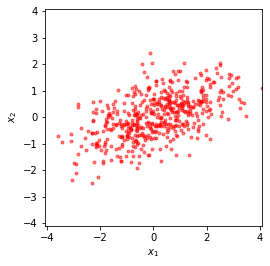

In [2]:
mean = [0, 0] # centered around 0 for SVD
cov = [[1, 0], [2, 1]] # non-diagonal covariance to get correlation
x1, x2 = np.random.multivariate_normal(mean, cov, 500).T

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x1, x2, ".", alpha=0.5, c="r")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_xlim(-max(x1), max(x1))
ax1.set_ylim(-max(x1), max(x1))
ax1.set_aspect('equal', adjustable='box')

We now have data of two dimensions, that are correlated, on two axis which do not maximally show the variance of our data.


In [3]:
# Put the arrays into the same object
X = np.stack(arrays=[x1, x2], axis=1)

## Implimenting SVD

The sklearn PCA class impliments SVD which if we use `n_components=n_variaibles` it will decompose the matrix without losing dimensions. The object then has the attributes we need for plotting once it is fit.

In [4]:
# "fit" -> perform SVD to 2 components
pca = PCA(n_components=2, random_state=123)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
# The object has now got characteristic attributes
pca.singular_values_

array([34.92367306, 14.7836962 ])

In [6]:
# The vector of each component in the original feature space
pca.components_

array([[-0.92617034, -0.37710541],
       [-0.37710541,  0.92617034]])

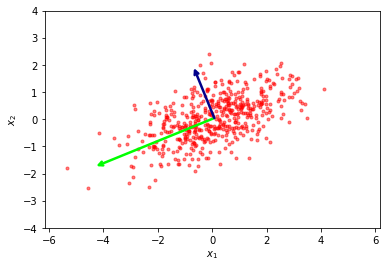

In [7]:
def draw_vector(v0, v1, ax=None,color=None):
    """
    Function to draw a vector on a given axis.
    
    Args:
    v0 (list[2,]): starting point of the vector
    v1 (list[2,]): finishing point of vector
    ax (plt axis): axis to plot graph to
    color (str): colour of arrow to draw 
    
    Returns:
    None.
    alters external state -> annotates given axis with arrow. 
    """
    ax = ax
    arrowprops=dict(arrowstyle='->',
                    linewidth=2.5,
                    shrinkA=0, shrinkB=0,
                    color=color)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    

# Test of plotting arrows.
scale = 3
# plot data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x1, x2, ".", alpha=0.5, c="r")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.axis('equal')

# Create vector and size
v0 = pca.components_[0] * scale * np.sqrt(pca.explained_variance_[0])
v1 = pca.components_[1] * scale * np.sqrt(pca.explained_variance_[1])
draw_vector(pca.mean_, pca.mean_ + v0, ax1, color="lime")
draw_vector(pca.mean_, pca.mean_ + v1, ax1, color="darkblue")
ax1.set_xlim(-4., 4.)
ax1.set_ylim(-4., 4.);

C:\Python36\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Attempting to set identical left == right == 4.097061282552592 results in singular transformations; automatically expanding.
C:\Python36\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Attempting to set identical bottom == top == 4.097061282552592 results in singular transformations; automatically expanding.


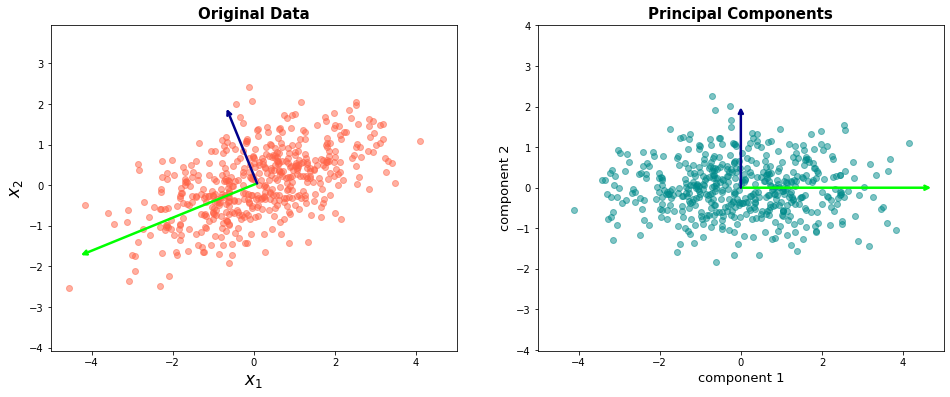

In [17]:
fig1, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
fig1.subplots_adjust()

#scaling factor for better visualisation of arrows (arbitrary)
scale = 3
# plot original data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5, c="tomato")
ax[0].set_xlabel("$x_1$", fontsize=17)
ax[0].set_ylabel("$x_2$", fontsize=17)
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-5, 5)
ax[0].axis('equal')
ax[0].set_title("Original Data", fontweight="bold", fontsize=15)

# Create and draw vectors of components on Original Data
v0 = pca.components_[0] * scale * np.sqrt(pca.explained_variance_[0])
v1 = pca.components_[1] * scale * np.sqrt(pca.explained_variance_[1])
draw_vector(pca.mean_, pca.mean_ + v0, ax[0], color="lime")
draw_vector(pca.mean_, pca.mean_ + v1, ax[0], color="darkblue")
    
    
# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c="darkcyan")

# Draw "vectors" -> line represenatitions on new dimensions
draw_vector([0, 0], [np.sqrt(pca.explained_variance_[0])*scale, 0], ax=ax[1], color="lime")
draw_vector([0, 0], [0, np.sqrt(pca.explained_variance_[1])*scale], ax=ax[1], color="darkblue")

ax[1].axis('equal')
ax[1].set_xlim(max(x1), max(x1))
ax[1].set_ylim(max(x1), max(x1))
ax[1].set(
          title='Principal Components',
          xlim=(-5, 5), ylim=(-5, 5));
ax[1].set_xlabel("component 1", fontsize=13)
ax[1].set_ylabel("component 2", fontsize=13)
ax[1].set_title("Principal Components", fontweight="bold", fontsize=15)

fig1.savefig('../images/SVDexample.png', dpi=600)
